<div>
<img align="center"
src="Images/HT-banner-CAP3.png"  width="950" height="9500"/>
</div>

<font color='#09427D'><center>**TRANSFERENCIA DE CALOR EN SUPERFICIES EXTENDIDAS**</font>
    
<font color='#09427D'><center>**ALETAS DE ÁREA DE SECCIÓN TRANSVERSAL UNIFORME**</font>
    
    
<font color='#09427D'><center>**EJEMPLO 3.9**</font>

Una varilla muy larga de 5 mm de diámetro tiene un extremo que se mantiene a $100 ^\circ\mathrm{C}$. La superficie de la varilla  se expone al aire ambiente a $25 ^\circ\mathrm{C}$ con un coeficiente de transferencia de calor por convección de $100 \mathrm{W/m^2\cdot K}$.

1. Determine las distribuciones de temperaturas a lo largo de las varillas construidas de cobre puro, aleación de aluminio 2024 y acero  inoxidable tipo AISI 316. ¿Cuáles son las pérdidas de calor correspondientes de las varillas?.
2. Calcule el largo de las varillas para que la suposición de una longitud infinita de una estimacióne exacta dé la pérdida de calor.

<div>
<img align="center"
src="Images/P239.jpg"  width="500" height="500"/>
</div>

La forma general de la ecuación de energías para condiciones unidimensionales en una superficie extendida es

$$\dfrac{d^2T}{dx^2}+ \left(\dfrac{1}{A_c} \dfrac{d A_c}{dx} \right) \dfrac{d T}{dx} - \left( \dfrac{1}{A_c} \dfrac{h}{k} \dfrac{d A_s}{dx} \right) (1)$$

En el caso para el área de sección transversal $Ac$ constante y el área de superficie $A_s(x) = Px$, la ecuación anterior es

$$\dfrac{d^2 T}{d x^2}- \dfrac{hP}{k A_c}(T-T_{\infty})=0.  $$

Se define $\theta(x)= T(x)-T_{\infty}$ como el exceso de temperatura lejos de la aleta.

La ecuación (1) toma la forma

$$\dfrac{d^2 \theta}{d x^2}- m^2\theta=0,$$

con $m^2 = \dfrac{hP}{kA_c}$.

La solución general de la ecuación anterior es 

$$\theta(x) = C_1 e^{mx}+C_2 e^{-mx}$$

Para evaluar las constantes $C_1$ y $C_2$ es necesario especificar las condiciones de frontera.

La primera condición de frontera es considerar que se conoce la temperatura donde se encuentra la aleta y la superficie que se expande $\theta(x=0)$

$$\theta(0)= T_b -T_\infty = \theta_b$$

La segunda condición de frontera es considerar una aleta cuya temperatura del extremo $\theta_L$ tienda a cero, es decir

$$L \rightarrow \infty, \theta_L \rightarrow 0$$.

Sustituimos la primera condición de frontera

$$\theta(x=0)=C_1 e^{m(0)}+C_2 e^{-m(0)}= \theta_b,$$

Sustituimos la segunda condición de frontera

$$\theta(x=L) = C_1 e^{mL} + C_2 e^{-mL} = 0$$

La solución toma la forma

$$\dfrac{\theta}{\theta_b} =  e^{-mx}$$

y el flujo de calor es

$$q_f = \sqrt{hPkA_c} \theta_b$$


La distribución de temperatura para el caso de una varilla muy larga es

$$\dfrac{\theta}{\theta_b} =  e^{-mx}$$


con $\theta_b = T_b -T_\infty$ y $\theta(x)= T(x)-T_{\infty}$

$$T (x )=  T_{\infty} + (T_b-T_{\infty})e^{-mx} $$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from macti.evaluacion import Evalua

In [2]:
def T(Tinf,Tb,x,h,k,D):
    #BEGIN SOLUTION
    m = np.sqrt((4*h)/(k*D))
    T = Tinf+((Tb-Tinf)*np.exp(-m*x))
    #END SOLUTION
    return T

In [3]:
#Tabla A.1 cobre, aleación de aluminio 2024 y acero inoxidable AISI 316
kc   = 398
ka   = 180
kss  = 14

h    = 100
Tinf = 25
Tb   = 100
D    = 0.005
x    = np.arange(0,0.3,0.01)

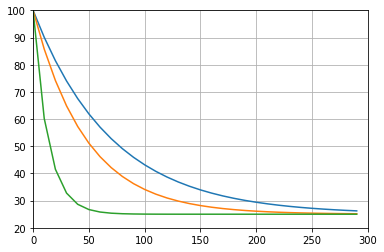

In [4]:
plt.plot(x*1000,T(Tinf,Tb,x,h,kc,D))
plt.plot(x*1000,T(Tinf,Tb,x,h,ka,D))
plt.plot(x*1000,T(Tinf,Tb,x,h,kss,D))
plt.xlim(0,300)
plt.ylim(20,100)
plt.grid()
plt.show()

In [5]:
def qf(h,D,k,Tb,Tinf):
    #BEGIN SOLUTION
    P  = np.pi*D
    Ac = (np.pi/4)*(D**2)
    qf = np.sqrt(h*P*k*Ac)*(Tb-Tinf)
    #END SOLUTION
    return qf

In [6]:
def Linf(k,D,h):
    #BEGIN SOLUTION
    P  = np.pi*D
    Ac = (np.pi/4)*(D**2)
    L  = 2.65*np.sqrt((k*Ac)/(h*P))
    #END SOLUTION
    return L

In [7]:
Linf(kc,D,h),Linf(ka,D,h),Linf(kss,D,h)

(0.18691425173057294, 0.12570053699169306, 0.03505620487160582)